<Figure size 432x288 with 0 Axes>

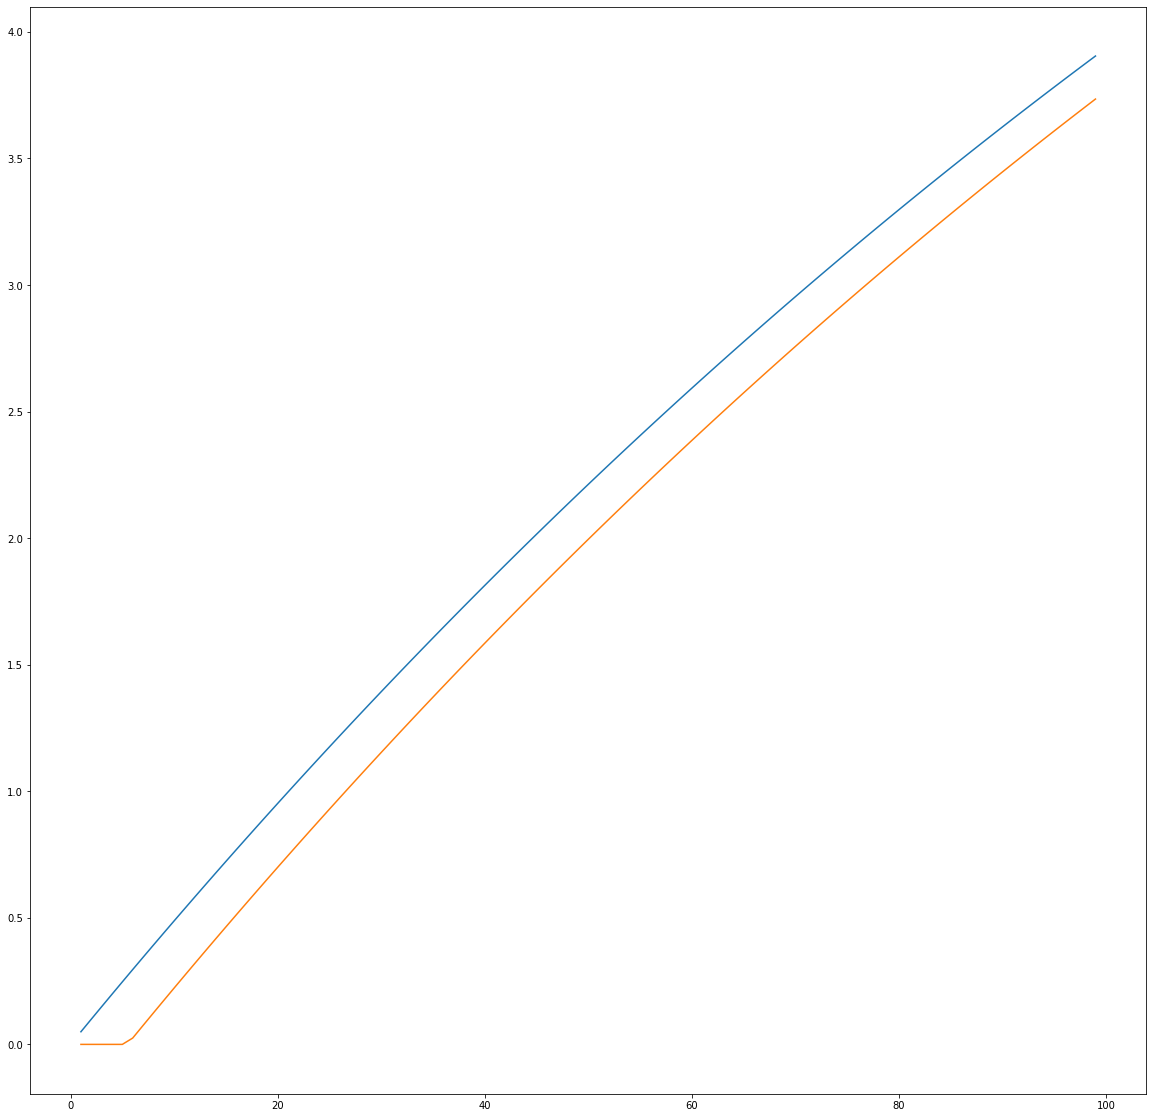

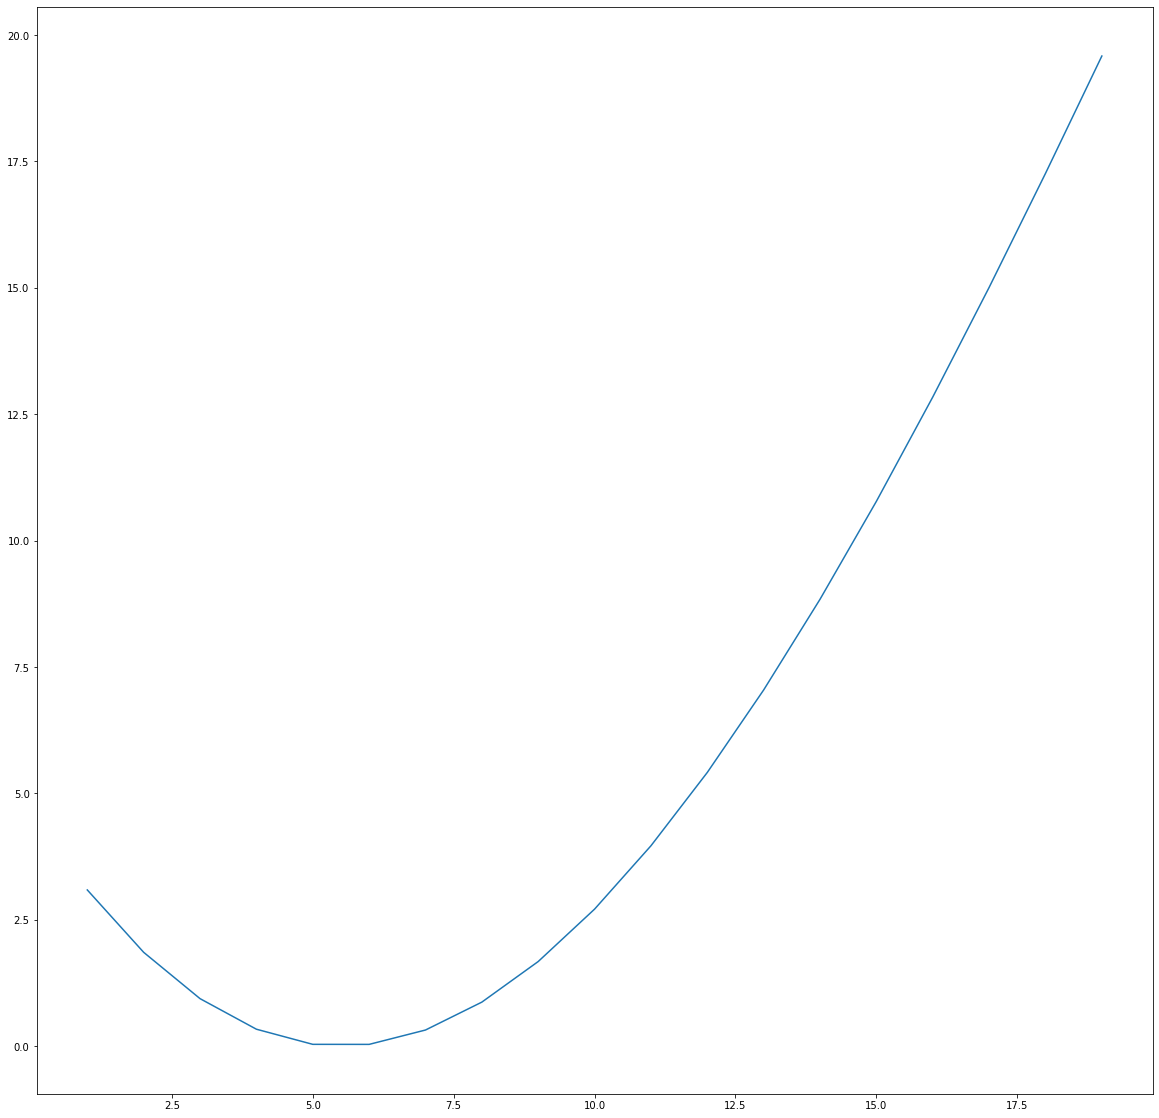

In [23]:
from numpy import log10, asarray, polyfit, ceil, arange, exp, sin, pi, log, random, sum, diff
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, lfilter, firwin, freqz

T = 100
time_period = list(arange(1,T))

K1 = 10
K2 = -10
tau = 200
measurement = [K1 + K2*exp(-x/tau) for x in time_period]

fir_filter = [0,0,0,0,0,0.5,0.5,0,0,0,0]
channel_1 = lfilter(fir_filter,1, measurement)

max_delay = 20

def error_calculation(signal, delayed_signal, delay):
    error = [ (signal[time-delay]-delayed_signal[time])**2 for time in list(arange(delay,T-delay)) ]
    return sum(error)

plt.figure(0)
plt.figure(figsize=(20,20))
plt.plot(time_period, measurement)
plt.plot(time_period, channel_1)
error = []
for delay in arange(1,max_delay):
    error.append(error_calculation(measurement,channel_1,delay))
    
plt.figure(1)
plt.figure(figsize=(20,20))    
plt.plot(arange(1,max_delay), error)